In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_test.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [6]:
pd.set_option('display.max_column',150)
app_train.sample(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
21977,259512,Cash loans,F,N,Y,0,135000.0,552555.0,24466.5,477000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.025164,-22311,365243,-4867.0,-4807,NaN,1,0,0,1,0,1,NaN,2.0,2,2,SUNDAY,8,0,0,0,0,0,0,XNA,NaN,0.251877,0.576209,0.1412,0.1952,0.9722,0.6192,0.0549,0.08,0.2069,0.2500,0.2917,0.0219,0.1093,0.1508,0.0270,0.1154,0.1439,0.2026,0.9722,0.6341,0.0554,0.0806,0.2069,0.2500,0.2917,0.0224,0.1194,0.1571,0.0272,0.1221,0.1426,0.1952,0.9722,0.6243,0.0553,0.08,0.2069,0.2500,0.2917,0.0223,0.1112,0.1535,0.0272,0.1178,NaN,block of flats,0.1737,"Stone, brick",No,1.0,0.0,1.0,0.0,-3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,8.0
37538,374731,Cash loans,F,N,Y,0,270000.0,331920.0,17077.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.030755,-16497,-173,-6616.0,-26,NaN,1,1,0,1,0,0,High skill tech staff,2.0,2,2,TUESDAY,13,0,0,0,0,0,0,Trade: type 6,0.660448,0.676682,0.801601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1829.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
41289,403386,Cash loans,F,N,N,1,270000.0,532494.0,30699.0,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020713,-11443,-4042,-4250.0,-3582,NaN,1,1,1,1,1,0,Accountants,3.0,3,2,MONDAY,6,0,0,0,0,0,0,Security Ministries,0.295514,0.537288,0.595456,0.0835,0.0196,0.9871,0.8232,0.0239,0.08,0.0345,0.5417,0.5833,0.0187,0.0672,0.0765,0.0039,0.0553,0.0851,0.0204,0.9871,0.8301,0.0241,0.0806,0.0345,0.5417,0.5833,0.0192,0.0735,0.0797,0.0039,0.0585,0.0843,0.0196,0.9871,0.8256,0.0240,0.08,0.0345,0.5417,0.5833,0.0191,0.0684,0.0779,0.

In [16]:
Income = app_train['AMT_INCOME_TOTAL']
Income_mean = Income.mean()
Income_std = Income.std()
print("Income mean : %.2f"%Income_mean)
print("Income standard difference : %.2f"%Income_std)
Income.describe()

Income mean : 178431.81
Income standard difference : 101522.59


count    4.874400e+04
mean     1.784318e+05
std      1.015226e+05
min      2.694150e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.250000e+05
max      4.410000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

<BarContainer object of 7 artists>

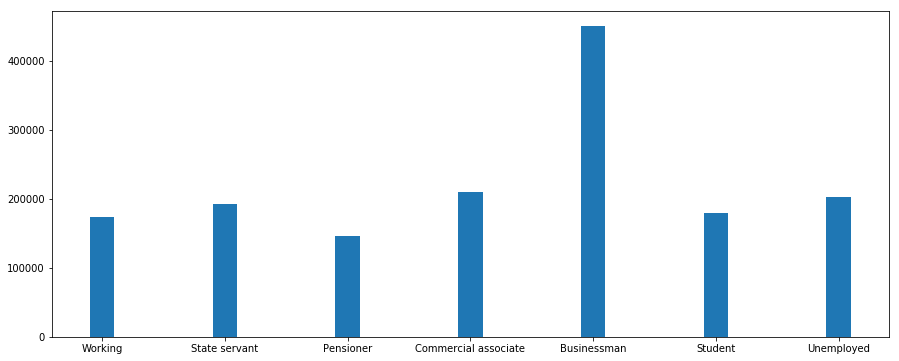

In [42]:
#method 1 matplotlib
df =app_train[['NAME_INCOME_TYPE','AMT_INCOME_TOTAL']]
mean_list=[]
for i in df['NAME_INCOME_TYPE'].unique():
    mean_list.append(df[df['NAME_INCOME_TYPE']==i].mean()['AMT_INCOME_TOTAL'])

plt.figure(1,figsize=(15,6))
plt.bar(x=df['NAME_INCOME_TYPE'].unique(), height=mean_list, width = 0.2, align='center')


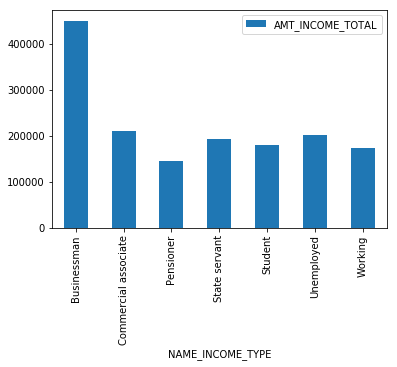

In [46]:
#method 2 pandas.plot
df =app_train[['NAME_INCOME_TYPE','AMT_INCOME_TOTAL']]
app_train.groupby('NAME_INCOME_TYPE').mean().plot(kind='bar',y ='AMT_INCOME_TOTAL')